EXERCISE 5

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [6]:
#To create scattered data X

# Specifying the number of cluster our data should have
n_components = 4

X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

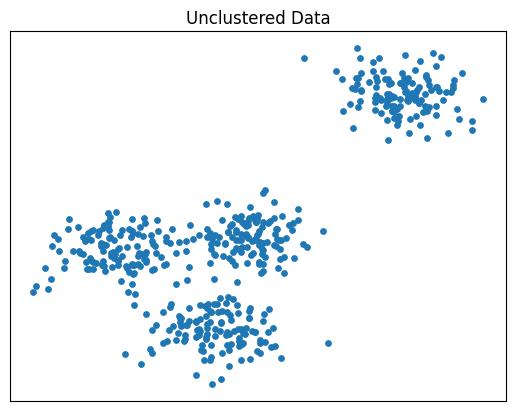

In [7]:
#Plot the resulting dataset.
plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

How many clusters are there? How far are they from one another?

We can see a group in the upper right corner and another group in the lower left corner, maybe there are two cluster because is posible to oobserve the espace or the distance between them.

In [9]:
from Unsupervised.kmeans import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=2)

# fit the data & predict cluster labels
kmeans.fit(X)

predicted_labels = kmeans.predict(X)

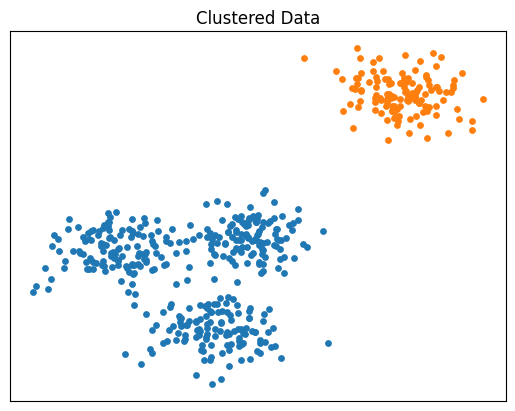

In [10]:
# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()